In [10]:
import sys
sys.path.append('../demAnalysisComponents/') #Add the path to the demAnalysis scripts

import os

import baseGrid as bg
import dem as dpy
import flowRoutingGrids as flw
import networkGraph as ng
from matplotlib import pyplot as plt
from matplotlib import cm
import numpy as np

from importlib import reload
%matplotlib inline

<IPython.core.display.Javascript object>


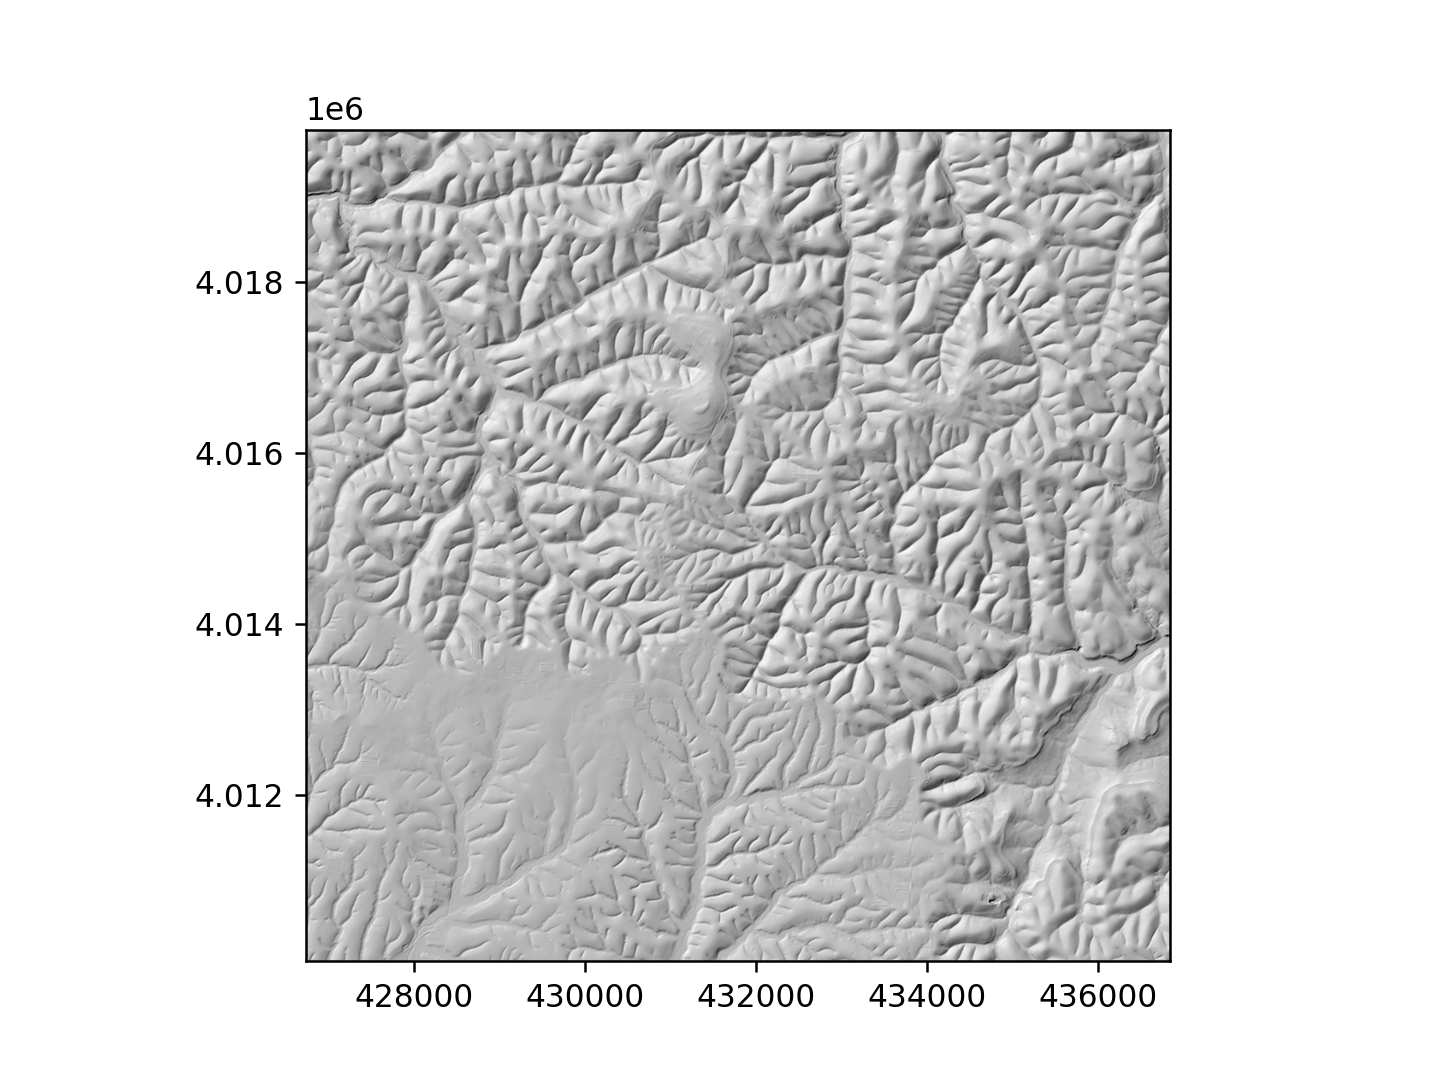

In [3]:
#First, lets open an example real DEM just to remind ourselves what we are working with
#Define a path to some data to test out functions
testDataPath = os.path.join('..','testData','rasterData','OD_10mTest.tif')

#Load the grid in
testDEM = dpy.demGrid([],rasterPath = testDataPath)

#Check to make sure it looks right
hs = testDEM.calcHillshade()
hs.plotGrid(cmap = 'gray',vmin = 0, vmax = 255)

#Load in the flow grid as well
testFlowGrid = flw.flowRoutingGrids(filePath=testDataPath)


In [3]:
reload(ng)

<module 'networkGraph' from '../demAnalysisComponents/networkGraph.py'>

In [4]:
'''Here we will find just the largest basin, and create representation of this network as a graph. '''

maxOutlet = np.argmax(testFlowGrid.areaGrid)
maxOutlet = np.unravel_index(maxOutlet,testFlowGrid.shape)

#Create an instance of a network graph, that extends all channels up to the specified minimum area
#Alternatively we could specify a channel mask if we wanted to use a more sophisticated
#identification of channel networks

channelNetwork = ng.networkGraph(testFlowGrid,maxOutlet[0],maxOutlet[1],Amin = 1e5)


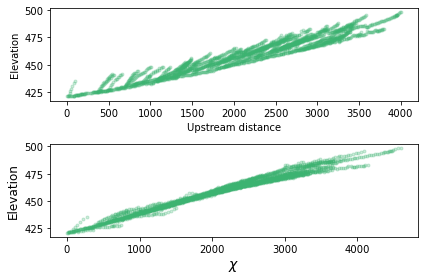

In [19]:
#Now we can preform operations on this network or visualize it in a few common ways
f,axs = plt.subplots(2,1, sharey = True)

channelNetwork.plotValues('upstream_distance','elevation',axs = axs[0],color = 'mediumseagreen',alpha = 0.25)
axs[0].set_ylabel('Elevation')
axs[0].set_xlabel('Upstream distance')


channelNetwork.plotChiProfiles(axs = axs[1],doAdjustOutletElevationToZero=False,A_0 = 1e6, theta = 0.25,
                              color = 'mediumseagreen', alpha = 0.25)

plt.tight_layout()

In [20]:
'''Can plot map coordinates to look at the map view shape of the drainage network'''
f,axs = plt.subplots(1,1)
#Check to make sure it looks right
hs.plotGrid(axs = axs,cmap = 'gray',vmin = 0, vmax = 255)

#Can manually plot the x-y coordinates of the grid
channelNetwork.plotValues('x_coordinate','y_coordinate',axs = axs,color = 'r')

#Or can plot the links between nodes as lines
# channelNetwork.plotMapRepresentation(axs = axs, color = 'r')

<AxesSubplot:>

In [11]:
'''Sometimes having the full network results in a lot more data than we really want to store, because
a node in the graph is made for every point in the DEM. We can reduce the complexity of these networks by
'dissolving' them. This is a process by which we pluck out a key subset of nodes that we deem important in
order to construct a new graph. 
'''

dissNetwork = channelNetwork.dissolveNetwork_PreserveTributaryJunctions()

f,axs = plt.subplots(1,1)
#Check to make sure it looks right
hs.plotGrid(axs = axs,cmap = 'gray',vmin = 0, vmax = 255)

channelNetwork.plotValues('x_coordinate','y_coordinate',axs = axs,color = 'r')
dissNetwork.plotValues('x_coordinate','y_coordinate',axs = axs,color = 'darkorchid')


<AxesSubplot:>

In [12]:
'''There are a variety of functions for preforming this 'dissolve' procedure. They generally operate by searching up
the network from the outlet, and creating a duplicate network with those nodes that meet certain criteria.

This cell highlights a version identical to the one above, with the additional constraint that the maximum along flow
distance between any two cells cannot exceed some specified distance.
'''

maxSegmentLength = 100.0

dissNetwork = channelNetwork.dissolveNetwork_PreserveTributaryJunctionsLimitLength(maxSegmentLength)

f,axs = plt.subplots(1,1)
#Check to make sure it looks right
hs.plotGrid(axs = axs,cmap = 'gray',vmin = 0, vmax = 255)

# channelNetwork.plotValues('x_coordinate','y_coordinate',axs = axs,color = 'r')


dissNetwork.plotMapRepresentation(axs = axs,color = 'darkorchid')
dissNetwork.plotValues('x_coordinate','y_coordinate',axs = axs,color = 'darkorchid')

<AxesSubplot:>

<IPython.core.display.Javascript object>


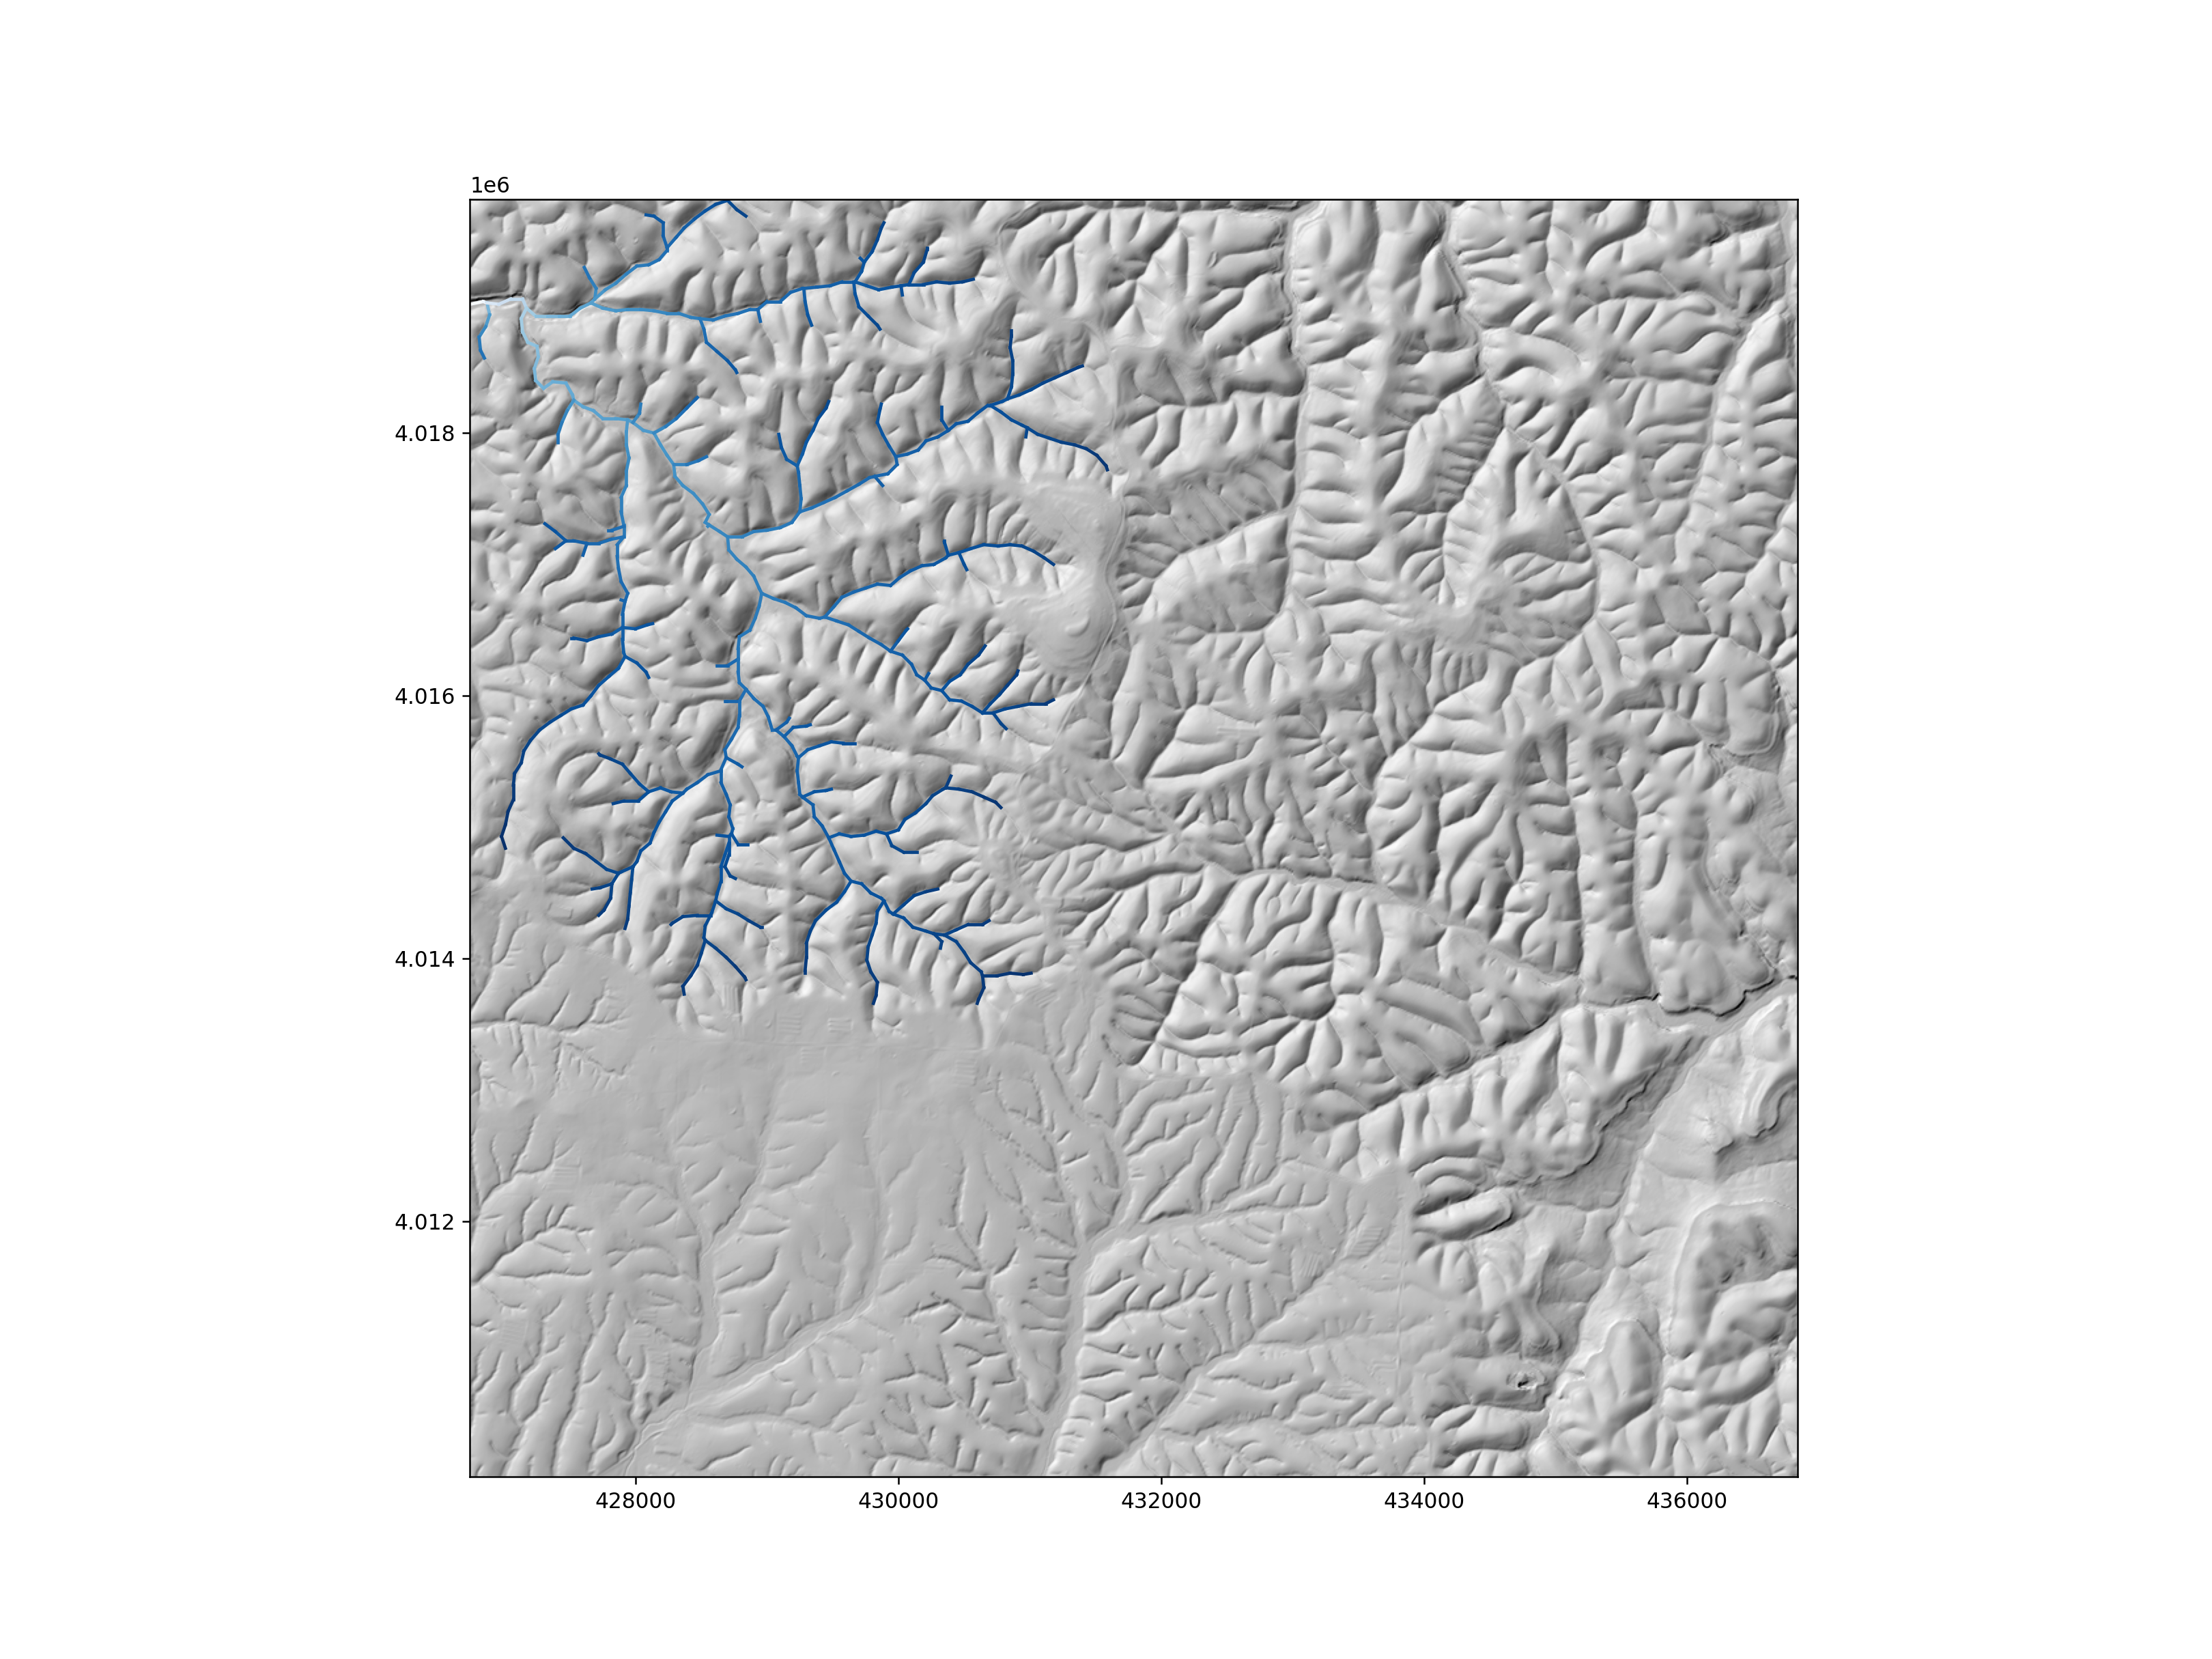

<AxesSubplot:>

In [9]:
'''
'''
%matplotlib notebook

maxSegmentLength = 100.0

dissNetwork = channelNetwork.dissolveNetwork_PreserveTributaryJunctionsLimitLength(maxSegmentLength, doPreserveChannelHeads=True)

f,axs = plt.subplots(1,1)
#Check to make sure it looks right
hs.plotGrid(axs = axs,cmap = 'gray',vmin = 0, vmax = 255)

# channelNetwork.plotValues('x_coordinate','y_coordinate',axs = axs,color = 'r')


dissNetwork.plotColorizedMapRepresentation(axs = axs,colorizeParameter = 'chi',colormapname = 'Blues',doLogTransformValues = True)
# dissNetwork.plotValues('x_coordinate','y_coordinate',axs = axs,color = 'r')

In [13]:
'''Sometimes we want to look at a suite of catchments. One strategy for this is making a list of different
networks. Here we will just store a dissolved version of each network that drains to an outlet in this map example'''
reload(ng)
outlets = testFlowGrid.findBoundaryOutlets()
basinNetworks = []
maxSegmentLength = 200
for o in outlets:
    
    #Lets restrict this to some of the largest basins
    if testFlowGrid.areaGrid[o[0],o[1]] > 5e5:
        channelNetwork = ng.networkGraph(testFlowGrid,o[0],o[1],Amin = 1e4)
        
        #Limit segment length
#         basinNetworks.append(
#             channelNetwork.dissolveNetwork_PreserveTributaryJunctionsLimitLength(maxSegmentLength,
#                                                                                  doPreserveChannelHeads=True))
       
        
#         #Preserve minimum structure of network
        basinNetworks.append(channelNetwork.dissolveNetwork_PreserveTributaryJunctions(doPreserveChannelHeads=False))

../demAnalysisComponents\networkGraph.py:1025: RuntimeWarning: invalid value encountered in log10
  if doLogTransformValues:
../demAnalysisComponents\networkGraph.py:1025: RuntimeWarning: invalid value encountered in log10
  if doLogTransformValues:
../demAnalysisComponents\networkGraph.py:1025: RuntimeWarning: invalid value encountered in log10
  if doLogTransformValues:
../demAnalysisComponents\networkGraph.py:1025: RuntimeWarning: invalid value encountered in log10
  if doLogTransformValues:
../demAnalysisComponents\networkGraph.py:1025: RuntimeWarning: invalid value encountered in log10
  if doLogTransformValues:
../demAnalysisComponents\networkGraph.py:1025: RuntimeWarning: invalid value encountered in log10
  if doLogTransformValues:
../demAnalysisComponents\networkGraph.py:1025: RuntimeWarning: invalid value encountered in log10
  if doLogTransformValues:
../demAnalysisComponents\networkGraph.py:1025: RuntimeWarning: invalid value encountered in log10
  if doLogTransformValues:


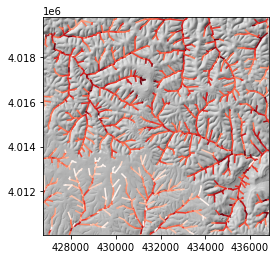

In [14]:
f,axs = plt.subplots(1,1)

#Check to make sure it looks right
hs.plotGrid(axs = axs,cmap = 'gray',vmin = 0, vmax = 255)

for dn in basinNetworks:

    dn.calcChannelSteepness()
    dn.calcSegmentDirections()
    dn.plotColorizedMapRepresentation(axs = axs,colorizeParameter = 'channel_steepness',
                                               colormapname = 'Reds',doLogTransformValues = True,
                                        vmin = 5, vmax = 50)



In [12]:
allInts, allDirections, allIDs,allLengths = [],[],[],[]

for i,dn in enumerate(basinNetworks):

    dn.calcSegmentDirections()
    dn.calcSegmentIntercepts(interceptCoordinate = testFlowGrid._xllcenter)
    dn.calcSegmentLengths()
    
    allInts.append(dn.flattenNetwork('downstream_line_intercept'))
    allDirections.append(dn.flattenNetwork('downstream_direction'))
    allLengths.append(dn.flattenNetwork('segment_length'))
    allIDs.append(np.ones_like(allInts[i])*i)
    
allDirections = np.hstack(allDirections)
allInts = np.hstack(allInts)
allIDs = np.hstack(allIDs)
allLengths = np.hstack(allLengths)

#Mask out segments less than 2*dx
minSegmentLen = 100
goodSegs = (allLengths  > minSegmentLen) & ~np.isinf(allInts)

allDirections= allDirections[goodSegs]
allInts = allInts[goodSegs]
allInts-=np.nanmean(allInts)
allIDs = allIDs[goodSegs]
allLengths = allLengths[goodSegs]

../demAnalysisComponents/networkGraph.py:567: RuntimeWarning: invalid value encountered in double_scalars
  m = (parent.y - child.y)/(parent.x - child.x)
../demAnalysisComponents/networkGraph.py:567: RuntimeWarning: divide by zero encountered in double_scalars
  m = (parent.y - child.y)/(parent.x - child.x)
../demAnalysisComponents/networkGraph.py:568: RuntimeWarning: invalid value encountered in double_scalars
  child.ds_lineInt = child.y - m*(child.x - interceptCoordinate)
/Users/sjohnstone/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in greater


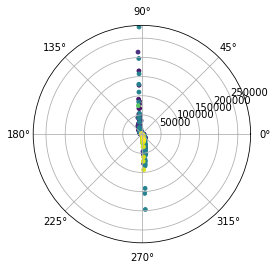

In [13]:
fig = plt.figure()
axs = fig.add_subplot(111, projection='polar')

axs.scatter(allDirections,allInts,[14],allIDs)
# axs.hist(allDirections,bins = 100)

In [14]:
'''Exploring thinking about colinearity'''
xs = []
ys = []
angles = []
allLengths = []

for dn in basinNetworks:

    dn.calcSegmentDirections()

    xs.append(dn.flattenNetwork('x_coordinate'))
    ys.append(dn.flattenNetwork('y_coordinate'))
    angles.append(dn.flattenNetwork('downstream_direction'))
    allLengths.append(dn.flattenNetwork('segment_length'))

#Turn each of these into a np array
# angles = np.arctan(np.tan(np.hstack(angles))) #Transform this into an angle where sign of direction doesn't matter
angles = np.hstack(angles)
xs = np.hstack(xs)
ys = np.hstack(ys)
allLengths = np.hstack(allLengths)

#Mask out segments less than 2*dx
minSegmentLen = 50
goodSegs = (allLengths  > minSegmentLen)

angles = angles[goodSegs]
xs = xs[goodSegs]
ys = ys[goodSegs]
allLengths = allLengths[goodSegs]

positions = np.vstack((xs,ys)).T


/Users/sjohnstone/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in greater


In [626]:
positions[:,0]

array([433158.89013646, 433018.89013646, 432948.89013646, ...,
       433808.89013646, 431768.89013646, 431838.89013646])

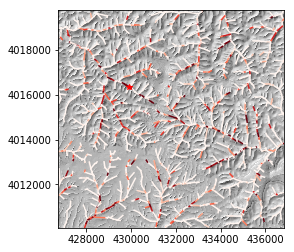

In [15]:
f,axs = plt.subplots(1,1)

#Check to make sure it looks right
hs.plotGrid(axs = axs,cmap = 'gray',vmin = 0, vmax = 255)

angle_thresh = np.deg2rad(30.0)
distThresh = 100.0

colinVals = []

idx = 454

for dn in basinNetworks:

#     dn.calcColinearityScore(positions[idx:idx+1,:], angles[idx:idx+1], angle_thresh, distThresh)
    dn.calcColinearityScore(positions, angles, angle_thresh, distThresh)
    colinVals.append(dn.flattenNetwork('colinearity_score'))

    dn.plotColorizedMapRepresentation(axs = axs,colorizeParameter = 'colinearity_score',
                                               colormapname = 'Reds',
                                                  doLogTransformValues = False,
                                                 vmin = 15.1, vmax = 22.17)
    
axs.plot(positions[idx:idx+1,0],positions[idx:idx+1,1], '*r')
colinVals = np.hstack(colinVals)[goodSegs]

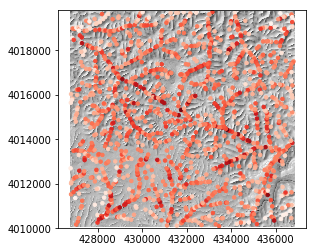

In [16]:
f,axs = plt.subplots(1,1)

#Check to make sure it looks right
hs.plotGrid(axs = axs,cmap = 'gray',vmin = 0, vmax = 255)


axs.scatter(positions[:,0],positions[:,1], [12],colinVals,cmap = 'Reds')

<IPython.core.display.Javascript object>


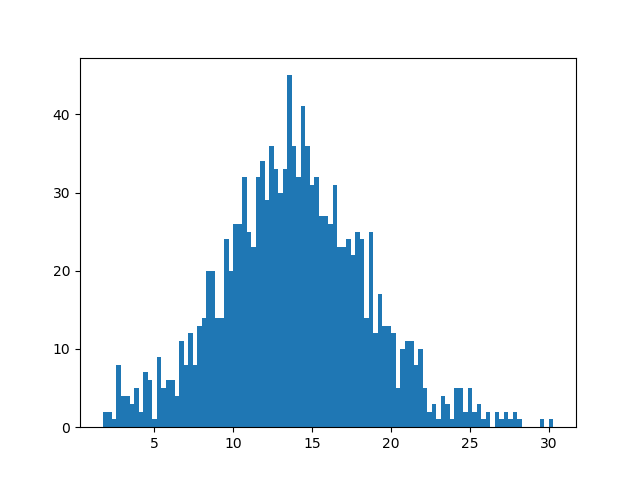

(array([ 2.,  2.,  1.,  8.,  4.,  4.,  3.,  5.,  2.,  7.,  6.,  1.,  9.,
         5.,  6.,  6.,  4., 11.,  8., 12.,  8., 13., 14., 20., 20., 14.,
        14., 24., 20., 26., 26., 32., 25., 23., 32., 34., 29., 36., 33.,
        30., 33., 45., 36., 32., 41., 36., 31., 32., 27., 27., 26., 31.,
        23., 23., 24., 22., 25., 24., 14., 25., 12., 17., 13., 13., 12.,
         5., 10., 11., 11.,  8., 10.,  5.,  2.,  3.,  1.,  4.,  3.,  1.,
         5.,  5.,  2.,  5.,  2.,  3.,  1.,  2.,  0.,  2.,  1.,  2.,  1.,
         2.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.]),
 array([ 1.73645649,  2.02180837,  2.30716024,  2.59251212,  2.87786399,
         3.16321587,  3.44856774,  3.73391962,  4.01927149,  4.30462337,
         4.58997524,  4.87532712,  5.16067899,  5.44603087,  5.73138274,
         6.01673462,  6.30208649,  6.58743837,  6.87279024,  7.15814212,
         7.44349399,  7.72884587,  8.01419774,  8.29954962,  8.58490149,
         8.87025337,  9.15560524,  9.44095712,  9.72630899, 10.011660

In [629]:
f,axs = plt.subplots(1,1)
axs.hist(colinVals[~np.isnan(colinVals) & ~np.isinf(colinVals)], bins = 100)

In [ ]:
colinVals

<IPython.core.display.Javascript object>


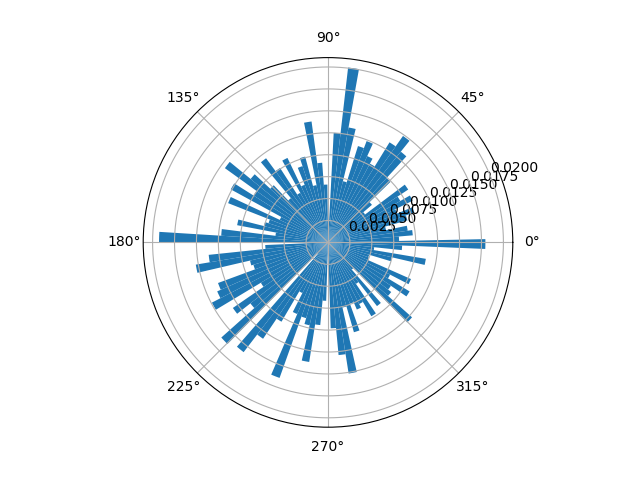

/Users/sjohnstone/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


(array([0.00716085, 0.01367457, 0.01528513, 0.00912873, 0.00887813,
        0.01336738, 0.01381171, 0.01491233, 0.00893159, 0.01317069,
        0.0112523 , 0.01629666, 0.0017402 , 0.01578476, 0.01324761,
        0.01048234, 0.00647462, 0.0088895 , 0.01640714, 0.00898701,
        0.00968202, 0.01379835, 0.00946398, 0.0066605 , 0.        ,
        0.00979923, 0.01290029, 0.015136  , 0.00760574, 0.01065889,
        0.00742331, 0.00832821, 0.00786824, 0.00976204, 0.00570119,
        0.00916037, 0.00411336, 0.01283696, 0.00916149, 0.00871374,
        0.01085042, 0.00797325, 0.01033971, 0.00497641, 0.00489908,
        0.0074721 , 0.01130992, 0.00529089, 0.00845721, 0.01794455,
        0.00810482, 0.00969781, 0.00918199, 0.00675924, 0.00939359,
        0.01041686, 0.00855287, 0.01075465, 0.00950059, 0.01095112,
        0.0052955 , 0.00659021, 0.00992325, 0.01326379, 0.0148478 ,
        0.01339202, 0.01016825, 0.01080872, 0.01236136, 0.01150158,
        0.00718032, 0.01330891, 0.02006609, 0.01

In [594]:
fig = plt.figure()
axs = fig.add_subplot(111, projection='polar')

axs.hist(angles[colinVals>0],bins = 100,weights = colinVals[colinVals>0]/np.sum(colinVals[colinVals>0]))

In [203]:


angle_mean = np.deg2rad(-60.0)
angleSigma = np.deg2rad(10.0)

fun = lambda t : (1.0/np.sqrt(2.0*np.pi*angleSigma**2))*np.exp(-(np.arctan(np.tan(t))-angle_mean)**2/(2.0*angleSigma**2))
maxVal = fun(angle_mean)

f,axs = plt.subplots(1,1, figsize = (4,4),dpi = 120)
#Check to make sure it looks right
hs.plotGrid(axs = axs,cmap = 'gray',vmin = 0, vmax = 255)
for dn in basinNetworks:

    dn.calcChildAttributeValue('downstream_direction',fun)

    dn.plotColorizedMapRepresentation(axs = axs,colorizeParameter = 'function_value',
                                               colormapname = 'Reds',
                                                  doLogTransformValues = False,
                                                 vmin = 0, vmax = maxVal, linewidth = 0.7)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


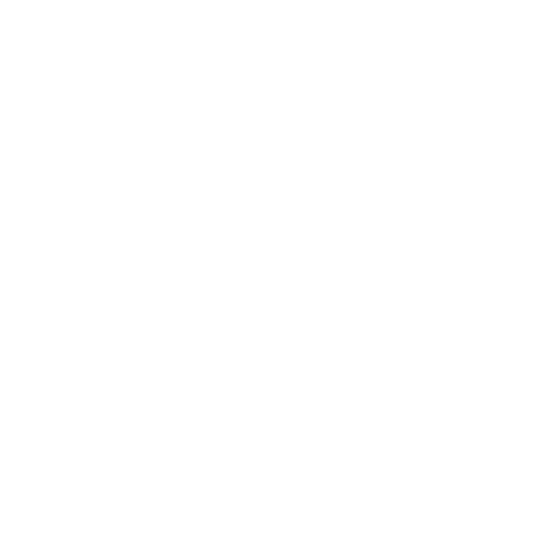

<IPython.core.display.Javascript object>


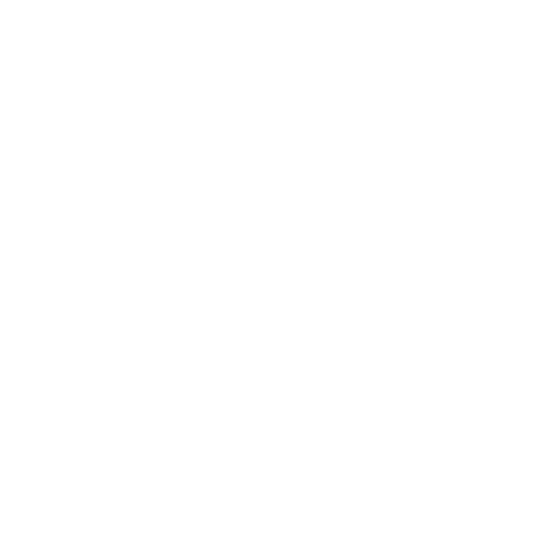

<IPython.core.display.Javascript object>


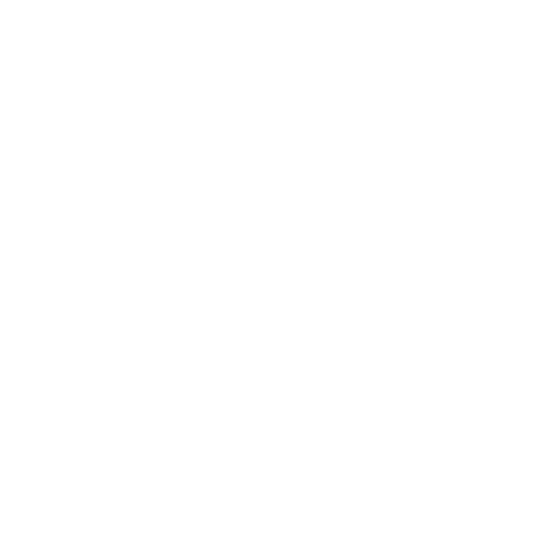

<IPython.core.display.Javascript object>


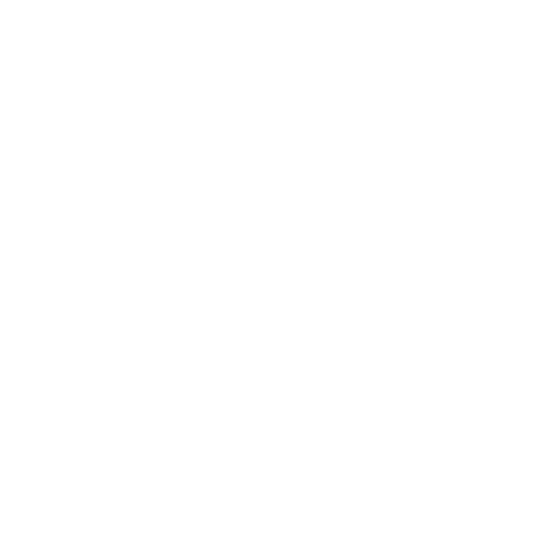

<IPython.core.display.Javascript object>


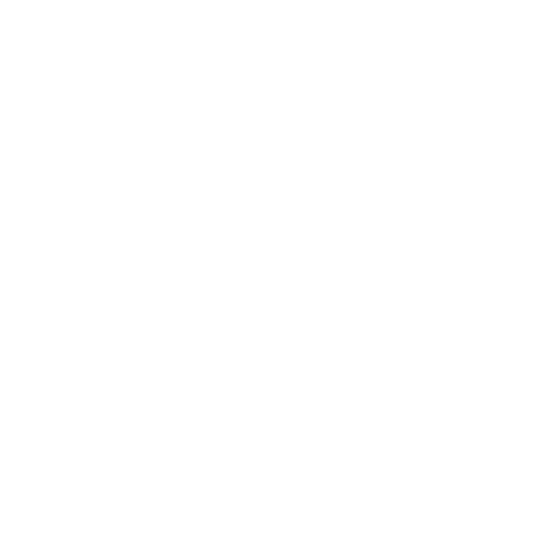

<IPython.core.display.Javascript object>


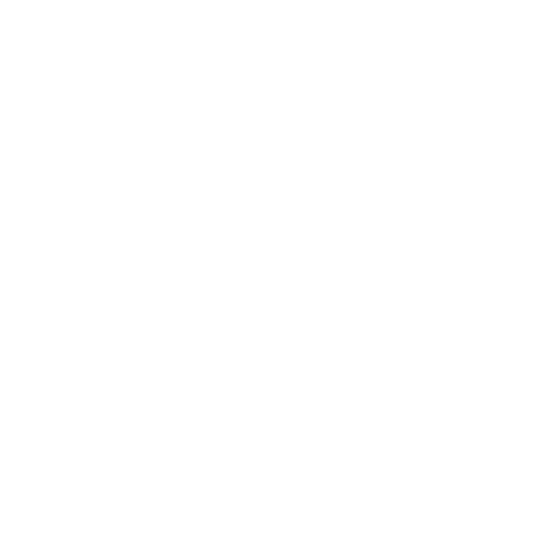

<IPython.core.display.Javascript object>


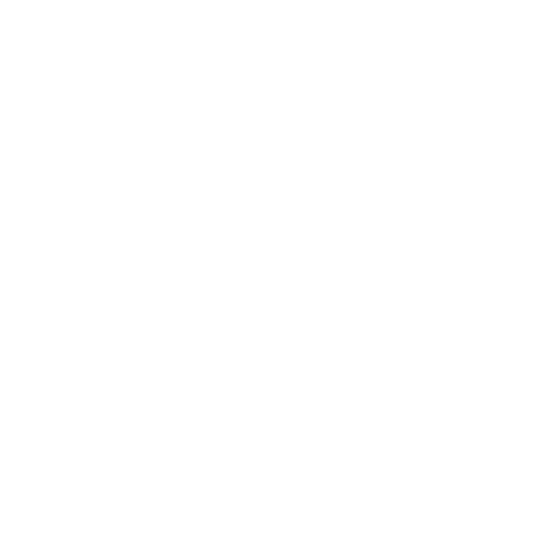

<IPython.core.display.Javascript object>


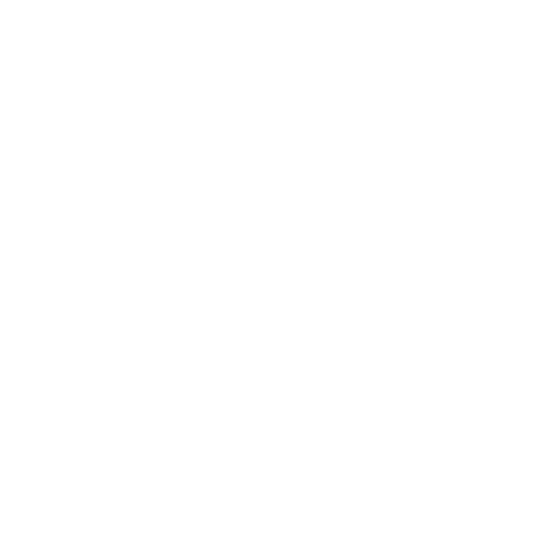

<IPython.core.display.Javascript object>


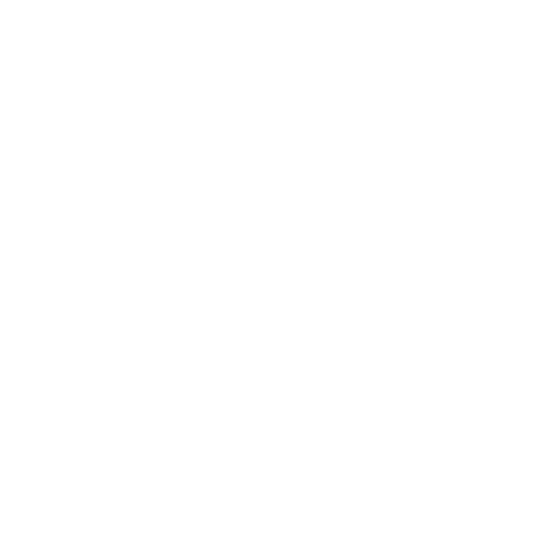

<IPython.core.display.Javascript object>


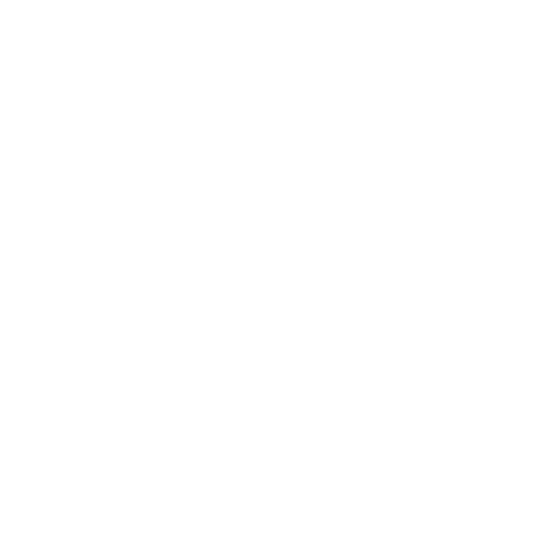

<IPython.core.display.Javascript object>


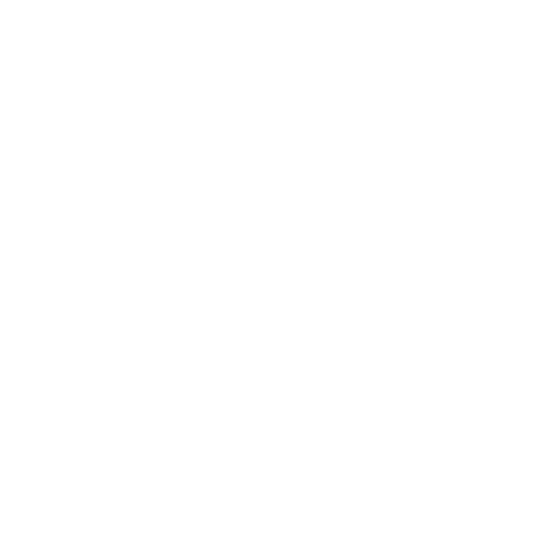

<IPython.core.display.Javascript object>


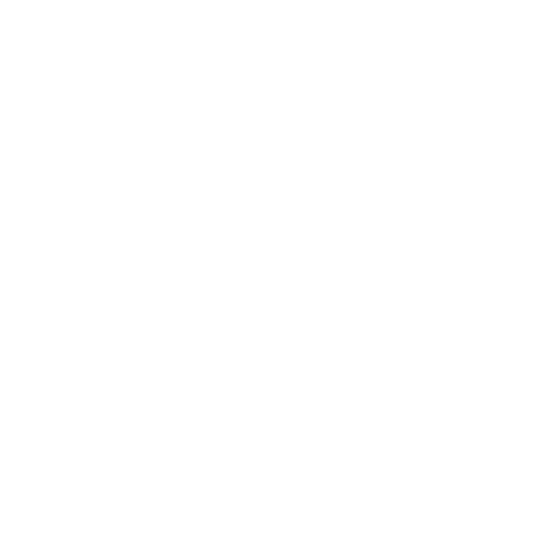

<IPython.core.display.Javascript object>


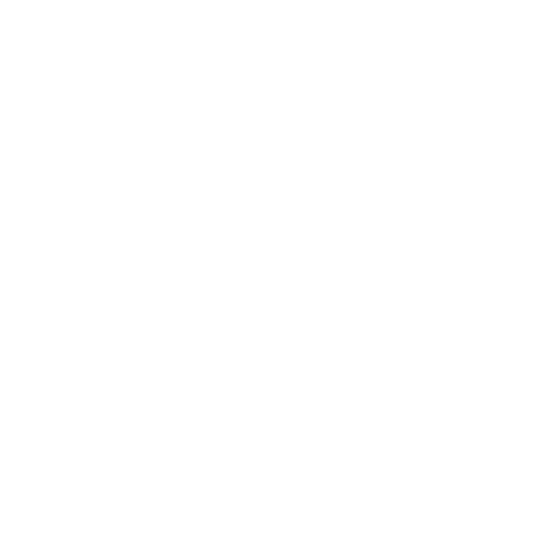

<IPython.core.display.Javascript object>


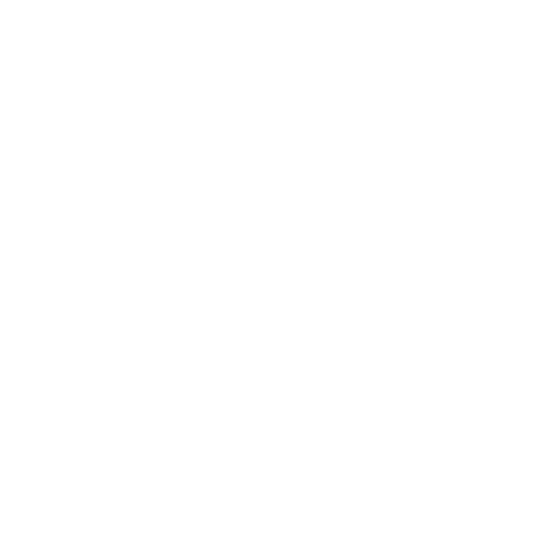

<IPython.core.display.Javascript object>


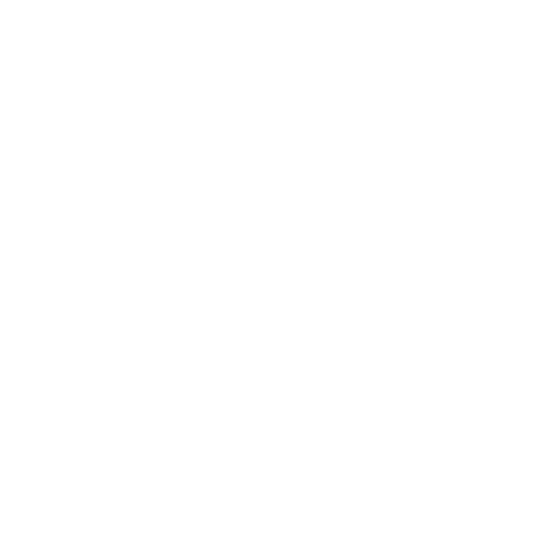

<IPython.core.display.Javascript object>


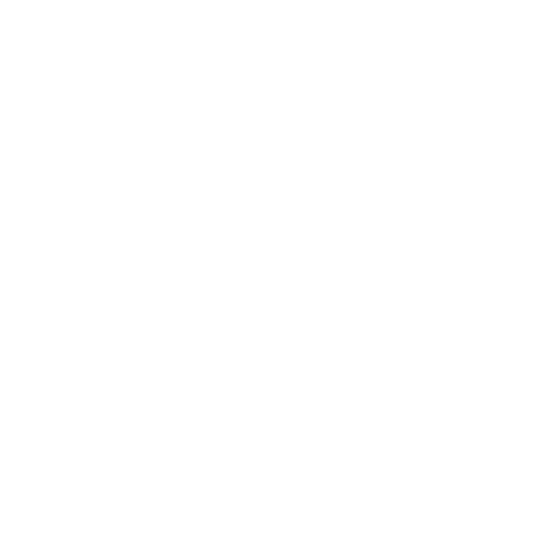

<IPython.core.display.Javascript object>


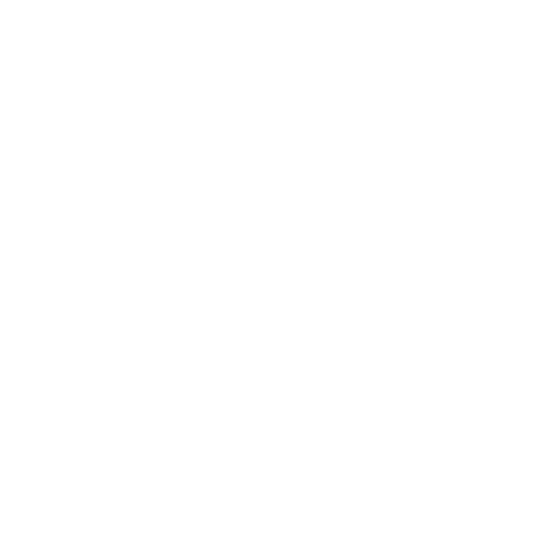

<IPython.core.display.Javascript object>


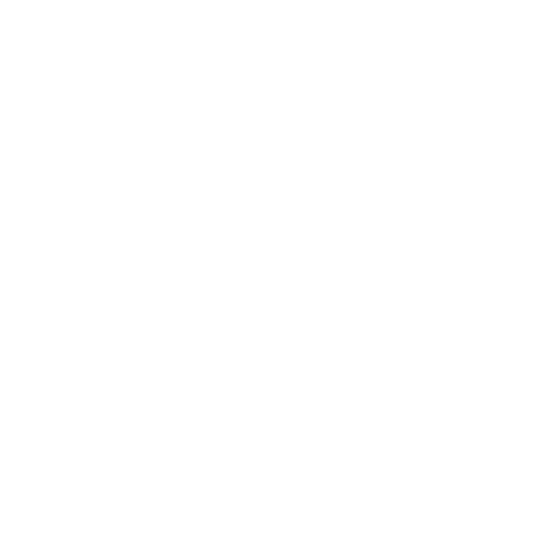

<IPython.core.display.Javascript object>


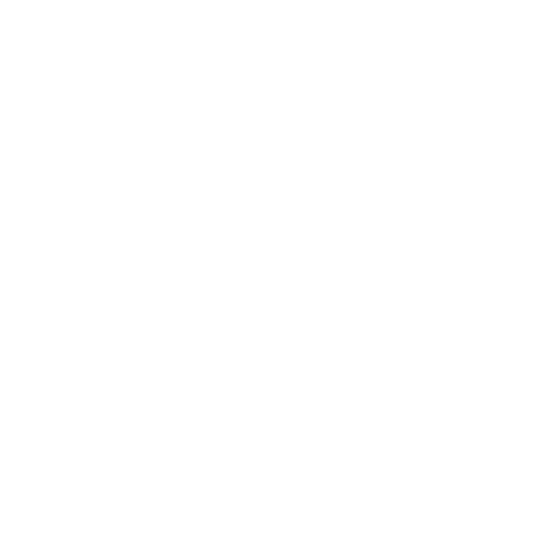

<IPython.core.display.Javascript object>


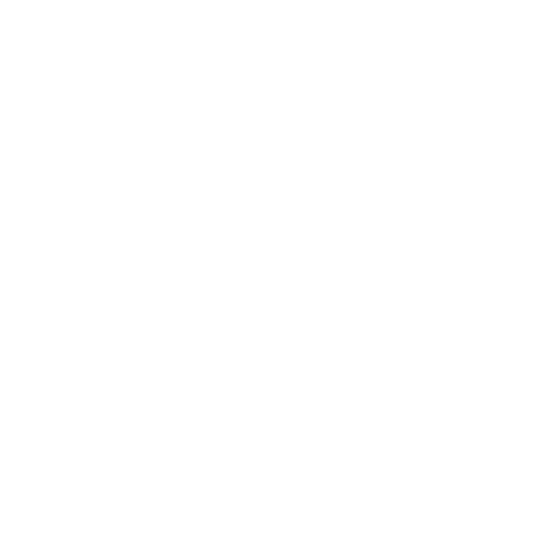

<IPython.core.display.Javascript object>


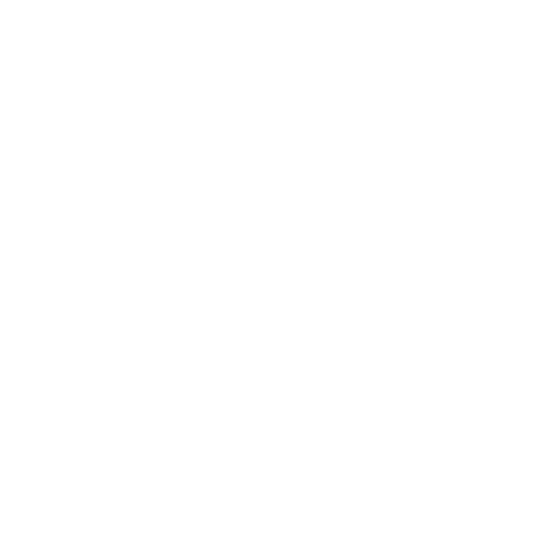

<IPython.core.display.Javascript object>


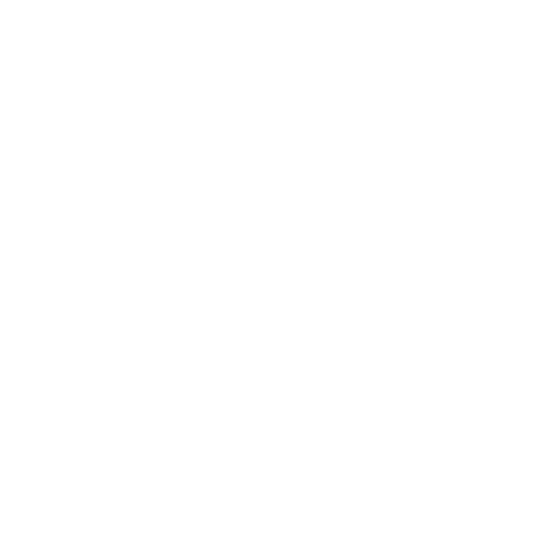

<IPython.core.display.Javascript object>


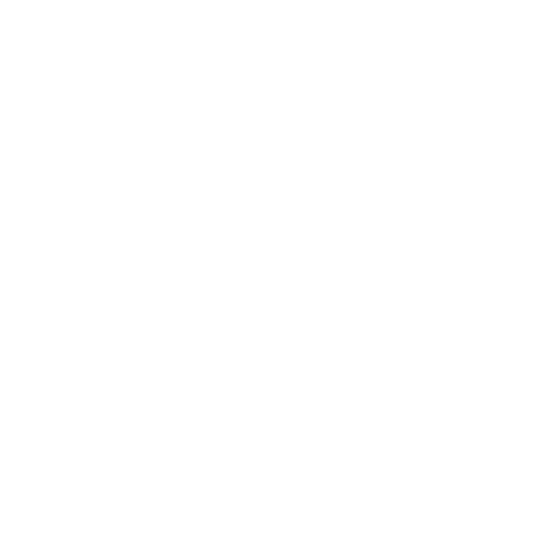

<IPython.core.display.Javascript object>


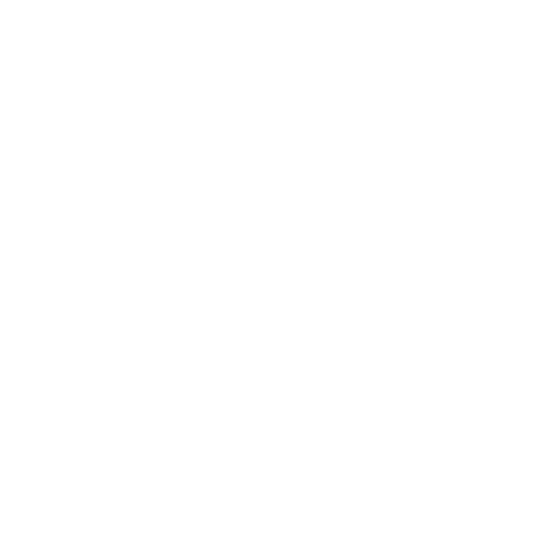

<IPython.core.display.Javascript object>


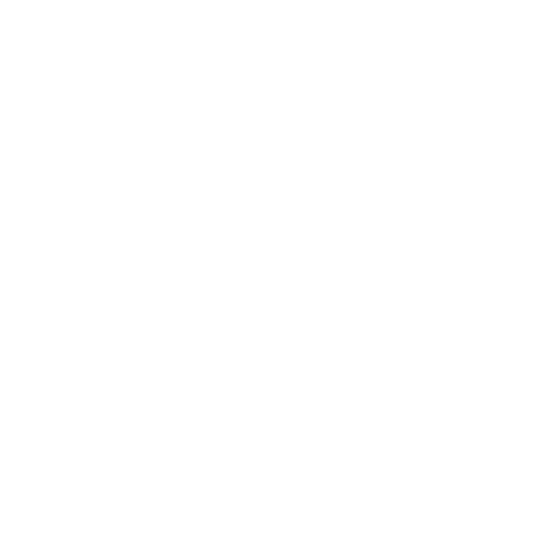

<IPython.core.display.Javascript object>


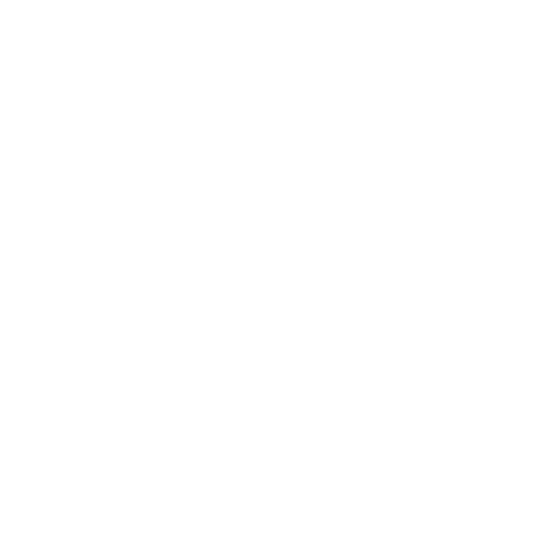

<IPython.core.display.Javascript object>


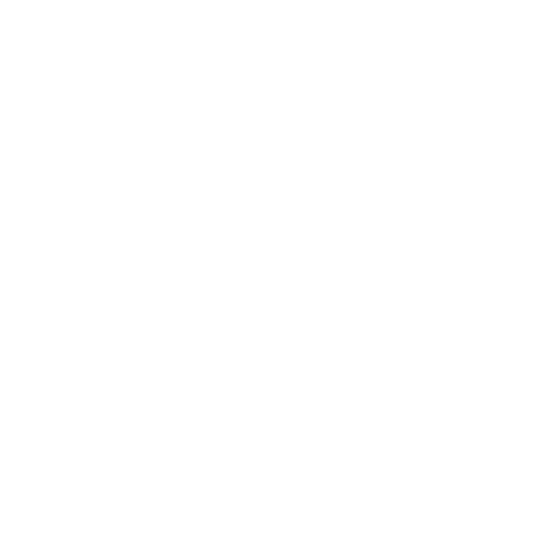

<IPython.core.display.Javascript object>


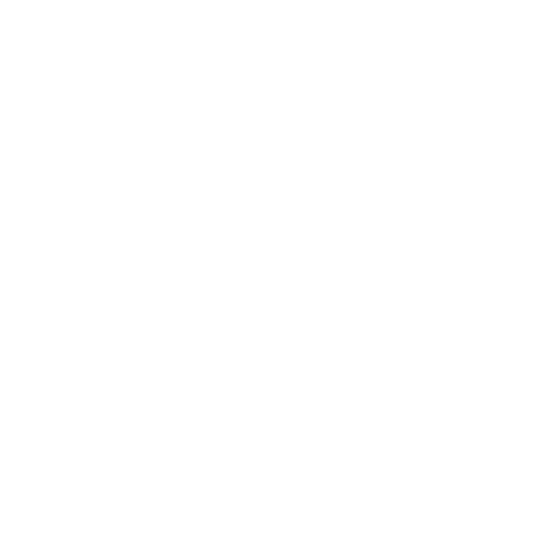

<IPython.core.display.Javascript object>


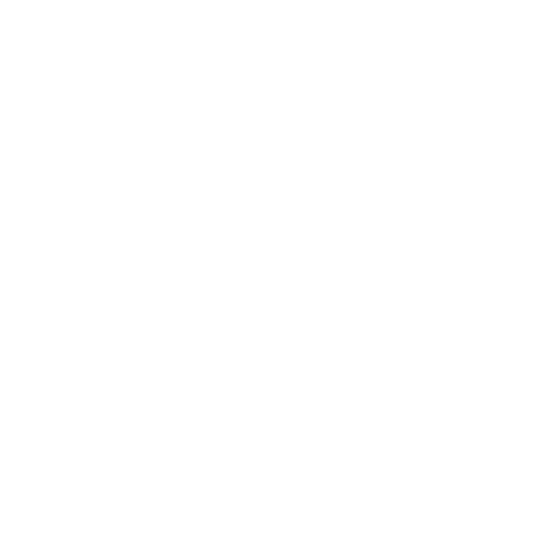

<IPython.core.display.Javascript object>


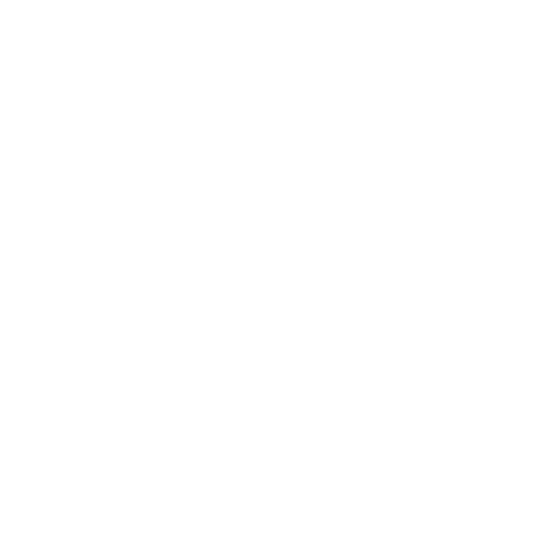

<IPython.core.display.Javascript object>


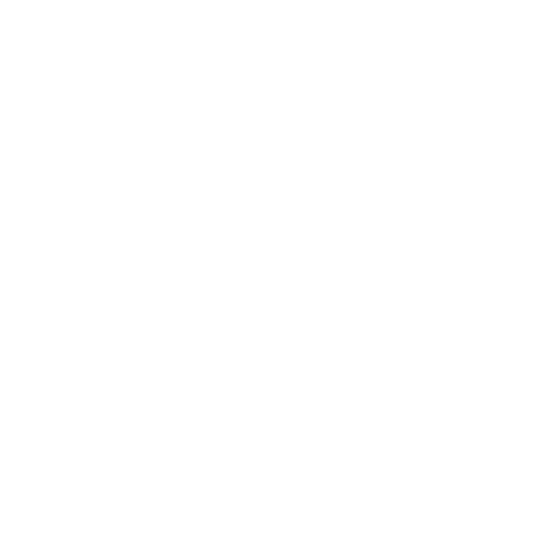

<IPython.core.display.Javascript object>


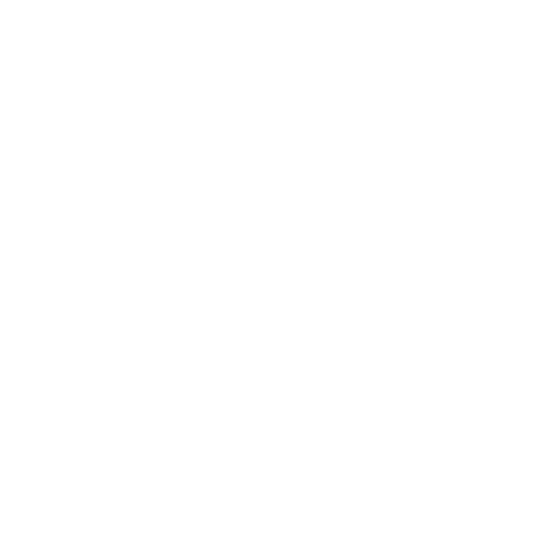

<IPython.core.display.Javascript object>


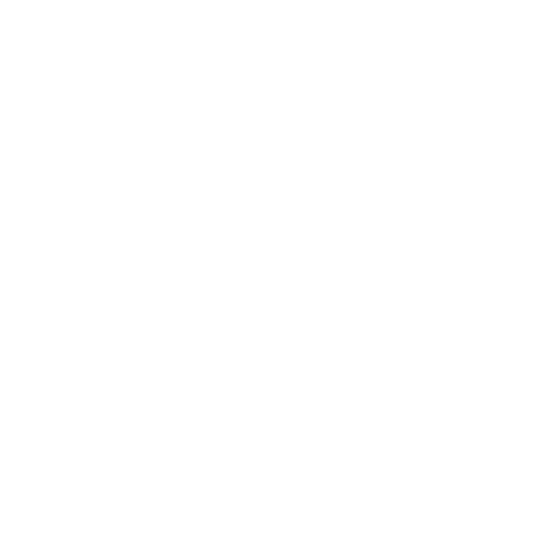

<IPython.core.display.Javascript object>


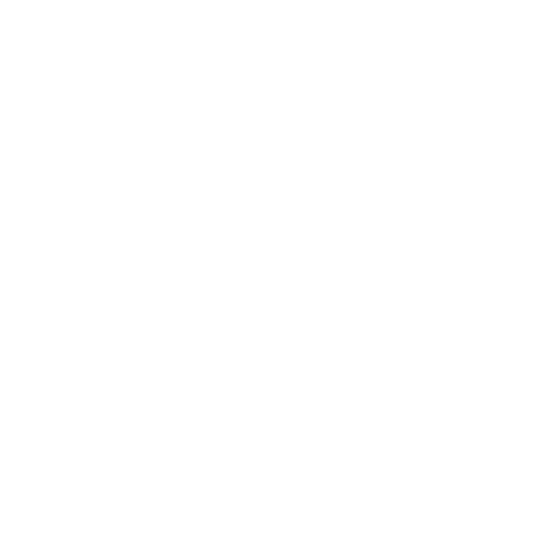

<IPython.core.display.Javascript object>


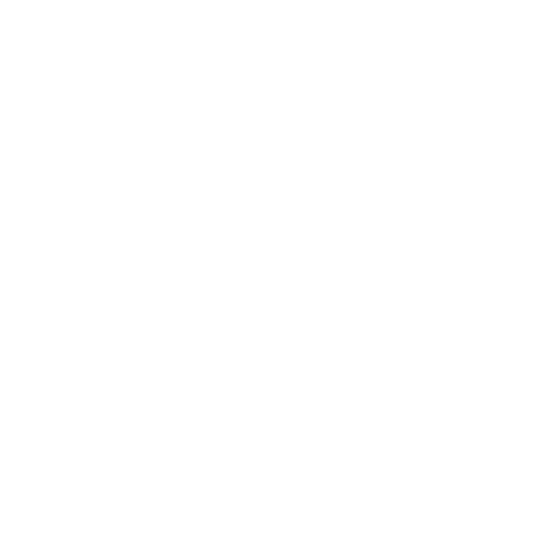

<IPython.core.display.Javascript object>


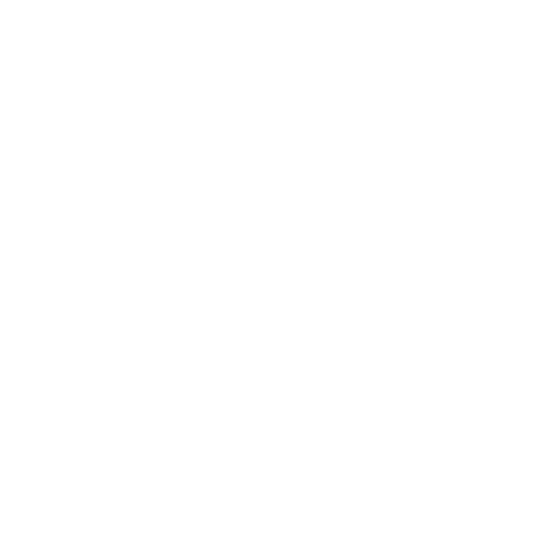

<IPython.core.display.Javascript object>


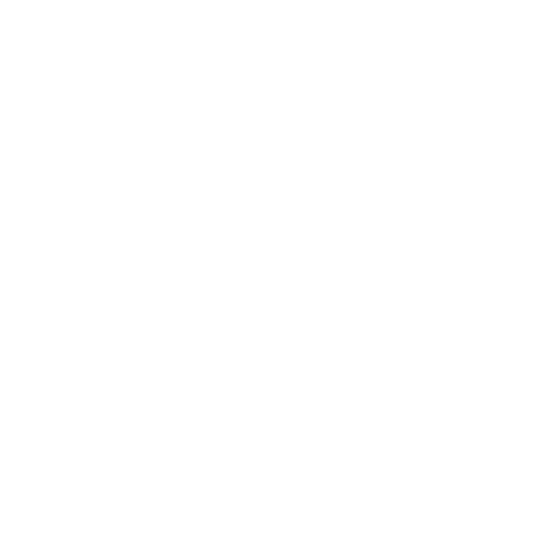

<IPython.core.display.Javascript object>


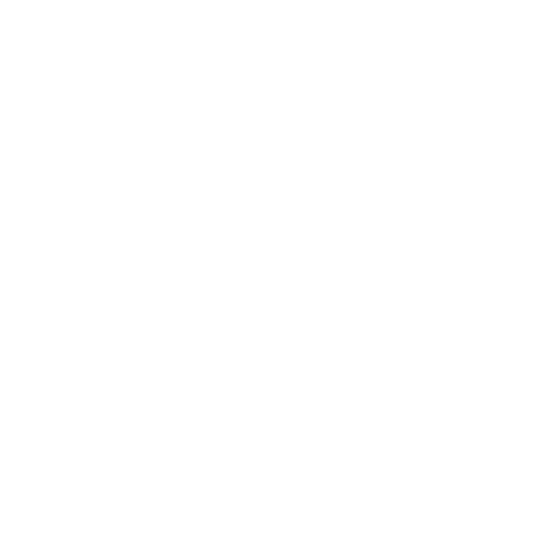

<IPython.core.display.Javascript object>


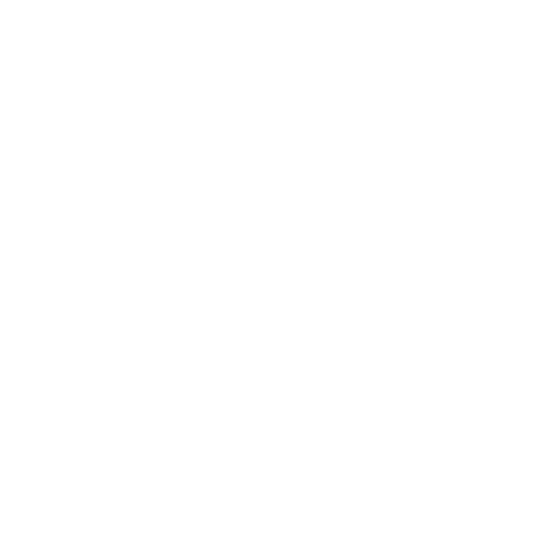

<IPython.core.display.Javascript object>


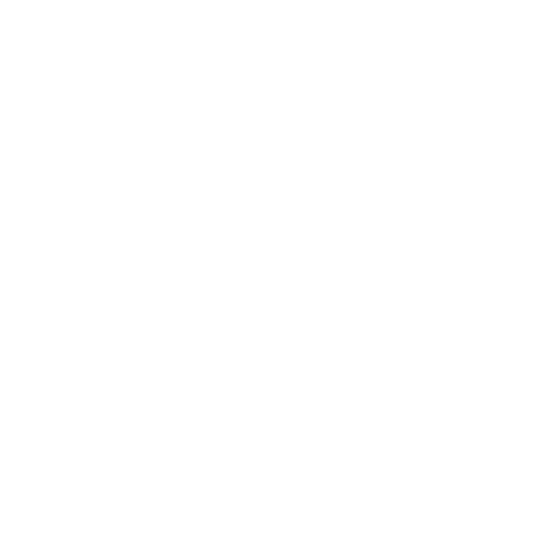

<IPython.core.display.Javascript object>


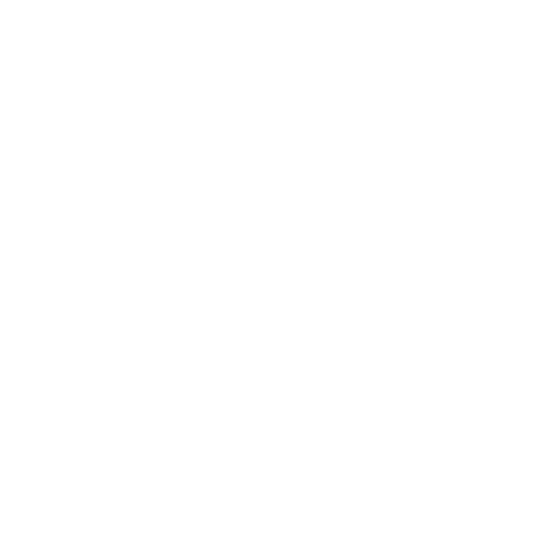

In [312]:
'''Lets make an animated Give highlighting channel orientations'''
import os


containingFolder = os.path.join('..','testFigures','OrientationMovie')
PNGFolder = os.path.join(containingFolder,'PNGs')
PNGnames = 'ColorizedOrientations_{:.0f}.png'


angle_mean = np.deg2rad(45.0)
angleSigma = np.deg2rad(20.0)

fun = lambda t : (1.0/np.sqrt(2.0*np.pi*angleSigma**2))*np.exp(-(np.arctan(np.tan(t))-angle_mean)**2/(2.0*angleSigma**2))

anglesToTest = [a for a in np.arange(-np.pi/2,np.pi/2+np.pi/40,np.pi/40)]

for angle_mean in anglesToTest:
    
    f,axs = plt.subplots(1,1, figsize = (4,4),dpi = 140)


    #Check to make sure it looks right
    hs.plotGrid(axs = axs,cmap = 'gray',vmin = 0, vmax = 255)
    fun = lambda t : (1.0/np.sqrt(2.0*np.pi*angleSigma**2))*np.exp(-(np.arctan(np.tan(t))-angle_mean)**2/(2.0*angleSigma**2))
    maxVal = fun(angle_mean)
    for dn in basinNetworks:

        dn.calcChildAttributeValue('downstream_direction',fun)

        dn.plotColorizedMapRepresentation(axs = axs,colorizeParameter = 'function_value',
                                                   colormapname = 'Reds',
                                                      doLogTransformValues = False,
                                                     vmin = 0, vmax = maxVal, linewidth = 1.0)
        axs.set_xticklabels([])
        axs.set_yticklabels([])
    plt.tight_layout()
    plt.savefig(os.path.join(PNGFolder,PNGnames.format(np.rad2deg(angle_mean))),transparent=True)
    plt.close(f)
    

In [313]:
import imageio
from glob import glob



from PIL import Image

def gen_frame(path):
    im = Image.open(path)
    alpha = im.getchannel('A')

    # Convert the image into P mode but only use 255 colors in the palette out of 256
    im = im.convert('RGB').convert('P', palette=Image.ADAPTIVE, colors=255)

    # Set all pixel values below 128 to 255 , and the rest to 0
    mask = Image.eval(alpha, lambda a: 255 if a <=128 else 0)

    # Paste the color of index 255 and use alpha as a mask
    im.paste(255, mask)

    # The transparency index is 255
    im.info['transparency'] = 255

    return im

framePath = PNGFolder

filenames = glob(os.path.join(framePath,'*.png'))
filenames.sort(key=lambda x: os.path.getmtime(x))
images = []
with imageio.get_writer(os.path.join(containingFolder,'Test_VaryingOrientations.gif'), mode='I',duration = 0.2) as writer:
    for filename in filenames:
#         image = imageio.imread(filename)
#         writer.append_data(image)
        images.append(gen_frame(filename))

        
images[0].save(os.path.join(containingFolder,'Test_VaryingOrientations.gif'),
                      save_all=True, append_images=images,duration=0.2,optimize = False, disposal = 2)